In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('tcs_share.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,29.519140,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,29.119476,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,27.111877,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,27.111877,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,27.046812,811856.0
...,...,...,...,...,...,...,...
4717,2021-07-26,3200.000000,3224.250000,3190.850098,3197.550049,3197.550049,1259611.0
4718,2021-07-27,3200.000000,3210.000000,3161.149902,3182.949951,3182.949951,1121367.0
4719,2021-07-28,3188.000000,3204.449951,3132.399902,3197.800049,3197.800049,1660654.0
4720,2021-07-29,3200.250000,3225.449951,3190.300049,3195.800049,3195.800049,1731997.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4722 non-null   datetime64[ns]
 1   Open       4706 non-null   float64       
 2   High       4706 non-null   float64       
 3   Low        4706 non-null   float64       
 4   Close      4706 non-null   float64       
 5   Adj Close  4706 non-null   float64       
 6   Volume     4706 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 258.4 KB


In [5]:
data = data.dropna()

In [6]:
import matplotlib.pyplot as plt

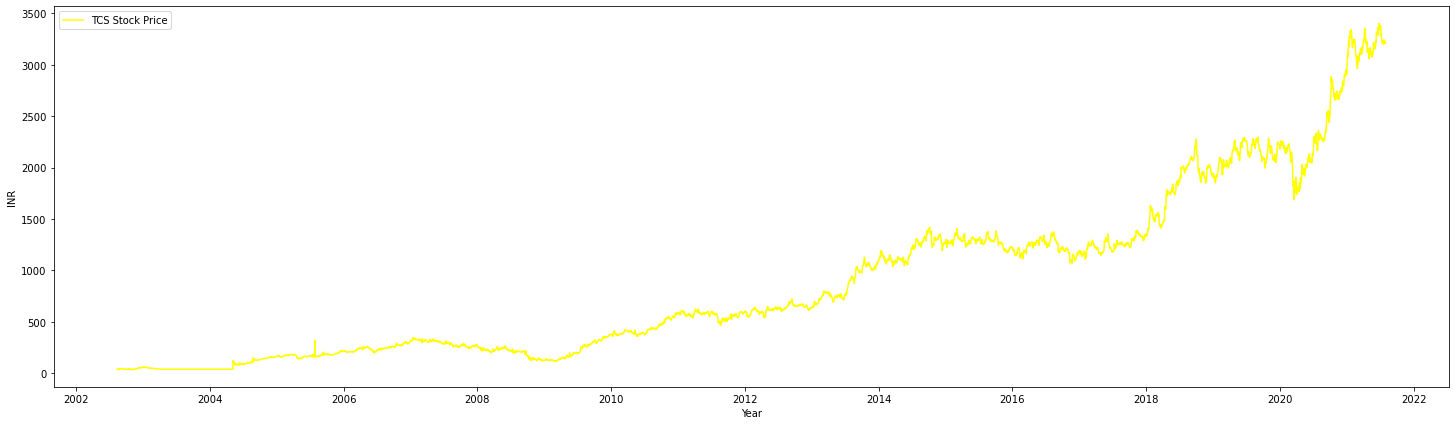

In [7]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date,data.High, color = 'yellow', label = 'TCS Stock Price')
plt.xlabel('Year')
plt.ylabel('INR')
plt.legend()
plt.show()

In [8]:
train_size = 0.8        
split_index = int(train_size * data.shape[0])

factors_column = ['Open', 'High', 'Low', 'Close', 'Volume']


train_set = data[factors_column].values[:split_index]
test_set = data[factors_column].values[split_index:]
print(split_index)
print(data.shape[0])

3764
4706


In [9]:
from sklearn.preprocessing import MinMaxScaler

# scale our price from 0 to 1

sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.fit_transform(test_set)

In [10]:
# this function will combine data of 60 days (we can change it using time_window parameter) 
train_set_scaled[0]
y_col_index=0;

In [11]:
def generate_data(series, y_col_index, time_window=60):
  X = []
  y = []
  for i in range(60, len(series)):
    X.append(series[i-time_window: i])
    y.append(series[i, y_col_index])
  return (np.array(X), np.array(y))

In [12]:
X_train, y_train = generate_data(train_set_scaled, y_col_index=y_col_index)
X_test, y_test = generate_data(test_set_scaled, y_col_index=y_col_index)

In [13]:
print('Training data shape: ',X_train.shape)
print('We will observe {} days price to predict next day price'.format(X_train.shape[1]))

Training data shape:  (3704, 60, 5)
We will observe 60 days price to predict next day price


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
model = Sequential()

# layer 1
#return_sequence=True, it will return something with shape
#unit means the dimension of the inner cells in LSTM.

model.add(LSTM(units = 50, return_sequences = True, input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))

# layer 2
model.add(LSTM(units = 30, return_sequences = True))
model.add(Dropout(0.2))

# layer 3
model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.2))

# layer 4
model.add(LSTM(units = 5))
model.add(Dropout(0.2))

# layer 5
model.add(Dense(units = 1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 30)            9720      
                                                                 
 dropout_1 (Dropout)         (None, 60, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 10)            1640      
                                                                 
 dropout_2 (Dropout)         (None, 60, 10)            0         
                                                                 
 lstm_3 (LSTM)               (None, 5)                 3

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs = 50,
          batch_size = 64,
          validation_data = (X_test, y_test))

Epoch 1/50
58/58 [==============================] - 32s 295ms/step - loss: 0.0355 - accuracy: 5.3996e-04 - val_loss: 0.0032 - val_accuracy: 0.0011
Epoch 2/50
58/58 [==============================] - 13s 231ms/step - loss: 0.0150 - accuracy: 2.6998e-04 - val_loss: 0.0040 - val_accuracy: 0.0011
Epoch 3/50
58/58 [==============================] - 14s 236ms/step - loss: 0.0140 - accuracy: 5.3996e-04 - val_loss: 0.0041 - val_accuracy: 0.0011
Epoch 4/50
58/58 [==============================] - 14s 234ms/step - loss: 0.0136 - accuracy: 5.3996e-04 - val_loss: 0.0028 - val_accuracy: 0.0011
Epoch 5/50
58/58 [==============================] - 14s 236ms/step - loss: 0.0119 - accuracy: 5.3996e-04 - val_loss: 0.0028 - val_accuracy: 0.0011
Epoch 6/50
58/58 [==============================] - 13s 223ms/step - loss: 0.0102 - accuracy: 5.3996e-04 - val_loss: 0.0031 - val_accuracy: 0.0011
Epoch 7/50
58/58 [==============================] - 13s 218ms/step - loss: 0.0102 - accuracy: 5.3996e-04 - val_loss: 0

In [18]:
test_prediction = model.predict(X_test)
test_prediction = (test_prediction * sc.data_range_[y_col_index]) + sc.data_min_[y_col_index]

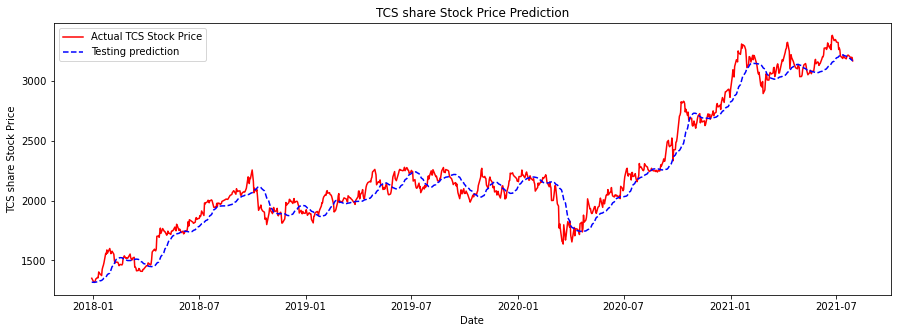

In [19]:
fig = plt.figure(figsize = (15, 5))
plt.plot(data.Date.values[ split_index+60 : ], data.Close.values[ split_index+60: ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

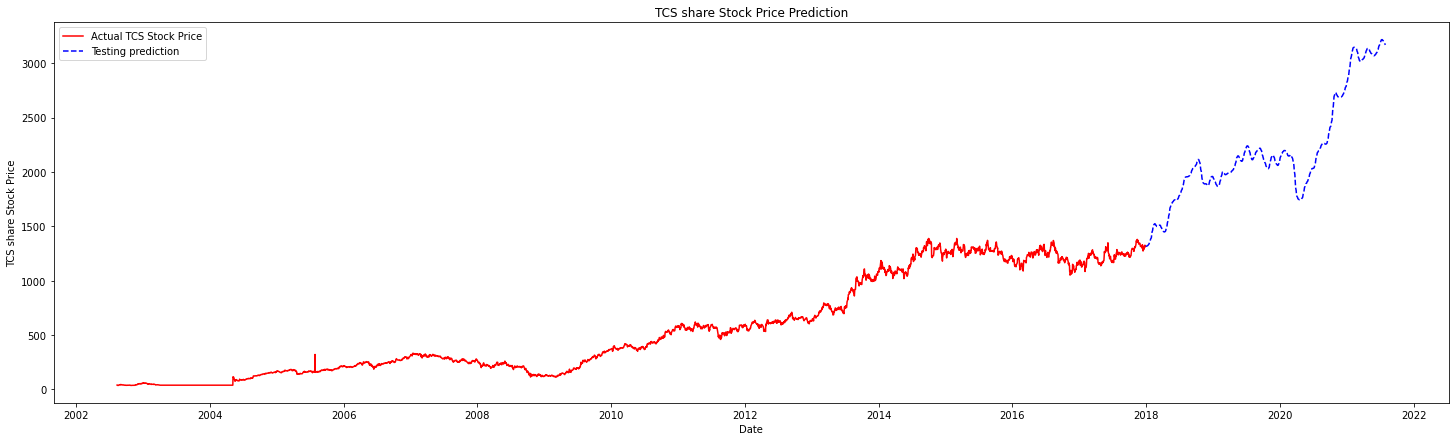

In [20]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+60 ], data.Close.values[ : split_index+60 ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

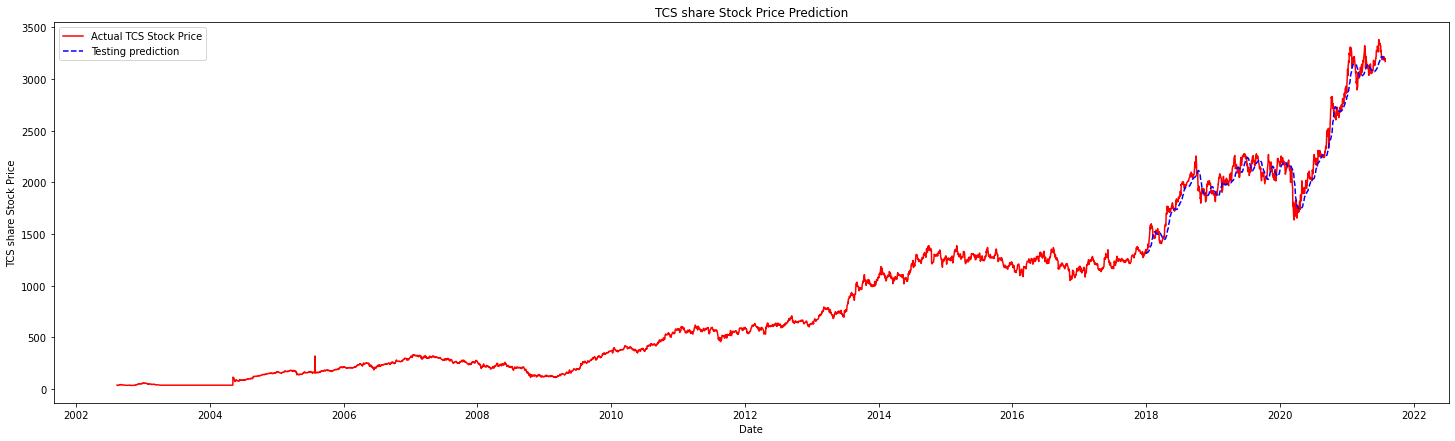

In [21]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date, data.Close, 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')

plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()

In [22]:
print(test_prediction)

[[1317.7009]
 [1316.8455]
 [1316.5957]
 [1316.9016]
 [1317.666 ]
 [1318.7875]
 [1320.1937]
 [1321.8783]
 [1323.8524]
 [1326.1797]
 [1328.9897]
 [1332.3618]
 [1336.2676]
 [1340.6604]
 [1345.5906]
 [1351.1356]
 [1357.3933]
 [1364.5232]
 [1372.773 ]
 [1382.3507]
 [1393.3109]
 [1405.577 ]
 [1418.9502]
 [1433.0547]
 [1447.4395]
 [1461.6678]
 [1475.3201]
 [1487.883 ]
 [1498.8682]
 [1507.9175]
 [1514.7992]
 [1519.4966]
 [1522.0984]
 [1522.7787]
 [1521.8041]
 [1519.4794]
 [1516.1497]
 [1512.2489]
 [1508.2747]
 [1504.6636]
 [1501.741 ]
 [1499.6938]
 [1498.5638]
 [1498.2894]
 [1498.7924]
 [1499.9854]
 [1501.7233]
 [1503.7958]
 [1505.9683]
 [1508.0912]
 [1509.8865]
 [1510.7937]
 [1510.4932]
 [1508.8516]
 [1505.8832]
 [1501.7527]
 [1496.7535]
 [1491.1963]
 [1485.3235]
 [1479.3147]
 [1473.3513]
 [1467.6128]
 [1462.2704]
 [1457.5294]
 [1453.5786]
 [1450.5748]
 [1448.6135]
 [1447.6859]
 [1447.6996]
 [1448.5713]
 [1450.3354]
 [1453.1852]
 [1457.265 ]
 [1462.6486]
 [1469.2843]
 [1477.0369]
 [1485.8773]

In [23]:
len(test_set)

942

In [24]:
x_input=test_set[882:942].reshape(-1,5)
x_input.shape

(60, 5)

In [25]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

In [26]:
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<=30):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,12,5)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape(1,12,5)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 300 into shape (1,12,5)

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form


In [ ]:
tr =test_predict.squeeze()
tr

In [ ]:
len(tr)

In [ ]:
fig = plt.figure(figsize = (25, 7))
plt.plot(data.Date.values[ : split_index+60 ], data.Close.values[ : split_index+60 ], 'r-', label = 'Actual TCS Stock Price')
plt.plot(data['Date'].values[split_index+60 : ], test_prediction, 'b--', label = 'Testing prediction')
plt.plot(data['High'].values[split_index+60 : ],tr,'r-',label='predicted values')
plt.title('TCS share Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TCS share Stock Price')
plt.legend()
plt.show()
